<a href="https://colab.research.google.com/github/Chamika36/Superstore-Sales-Analysis/blob/main/Superstore_Sales_Data_Analytics_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Superstore Sales Data Analytics Report
**Domain:** Retail / E-commerce  
**Objective:** Optimizing Profitability Through Discount, Category and Regional Performance Analysis

Loading the dataset

In [34]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Sample - Superstore.csv', encoding='windows-1252')

# Display the first few rows to verify
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Data Preprocessing

In [35]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Fill missing postal codes and set as integer
df['Postal Code'] = df['Postal Code'].fillna(0).astype(int)

# Convert date columns to datetime objects
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create Profit Margin feature
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100

# Encode categorical features for statistical modeling
le = LabelEncoder()
for col in ['Segment', 'Region', 'Category', 'Ship Mode']:
    df[f'{col}_Encoded'] = le.fit_transform(df[col])

# Check cleaned data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Segment_Encoded,Region_Encoded,Category_Encoded,Ship Mode_Encoded
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,16.00,0,2,0,2
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,30.00,0,2,0,2
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,47.00,1,3,1,2
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,-40.00,0,2,0,3
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,11.25,0,2,1,3


Dataset Overview

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- Dataset Information ---")
df.info()

print("\n--- Dataset Overview ---")
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nData Types:\n", df.dtypes)


--- Dataset Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   

Summary Statistics

In [37]:
print(df[['Sales', 'Quantity', 'Discount', 'Profit']].describe())

              Sales     Quantity     Discount       Profit
count   9994.000000  9994.000000  9994.000000  9994.000000
mean     229.858001     3.789574     0.156203    28.656896
std      623.245101     2.225110     0.206452   234.260108
min        0.444000     1.000000     0.000000 -6599.978000
25%       17.280000     2.000000     0.000000     1.728750
50%       54.490000     3.000000     0.200000     8.666500
75%      209.940000     5.000000     0.200000    29.364000
max    22638.480000    14.000000     0.800000  8399.976000


Sales Distribution


--- Sales Distribution (Histogram) ---


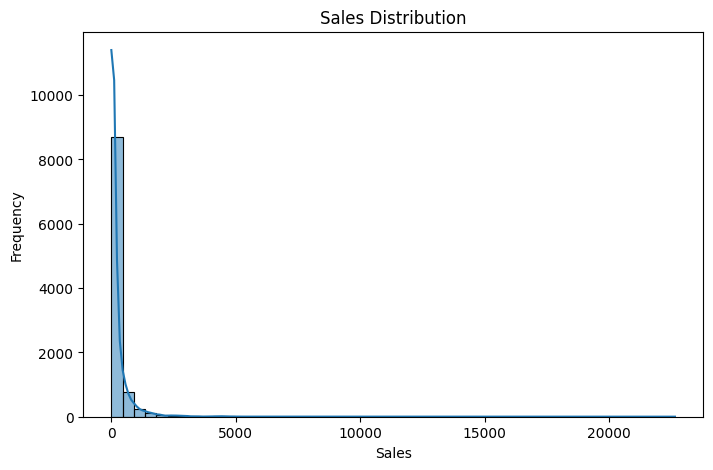

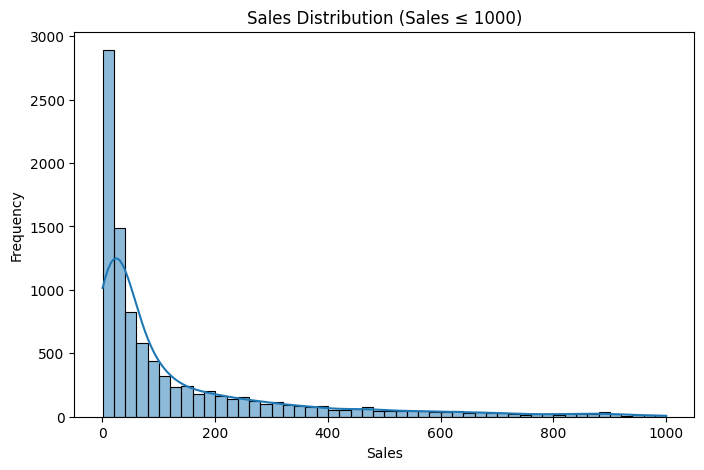

In [64]:
print("\n--- Sales Distribution (Histogram) ---")
plt.figure(figsize=(8,5))
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()


plt.figure(figsize=(8,5))
sns.histplot(df[df['Sales'] <= 1000]['Sales'], bins=50, kde=True)
plt.title("Sales Distribution (Sales ≤ 1000)")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

 Profit Distribution


--- Profit Distribution (Histogram) ---


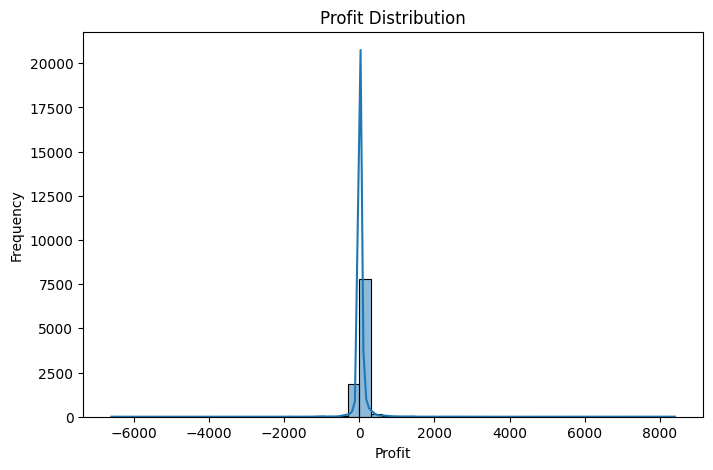

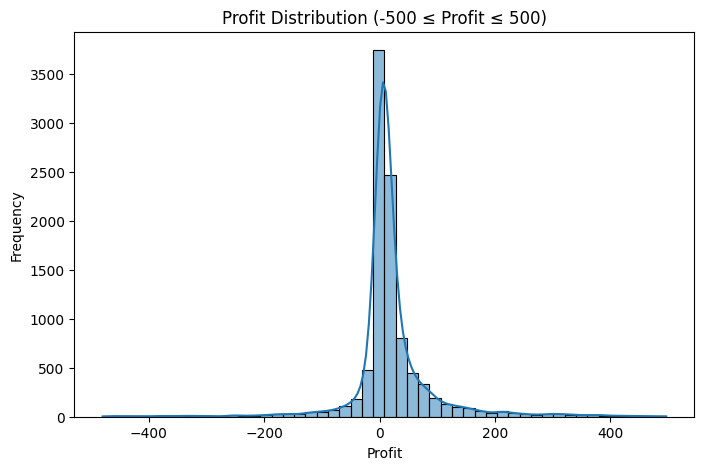

In [67]:
print("\n--- Profit Distribution (Histogram) ---")
plt.figure(figsize=(8,5))
sns.histplot(df['Profit'], bins=50, kde=True)
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df[(df['Profit'] >= -500) & (df['Profit'] <= 500)]['Profit'], bins=50, kde=True)
plt.title("Profit Distribution (-500 ≤ Profit ≤ 500)")
plt.xlabel("Profit")
plt.ylabel("Frequency")
plt.show()

Profit by Sub-Category


--- Profit by Sub-Category (Bar Chart) ---


/tmp/ipython-input-3788472107.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Total Profit')

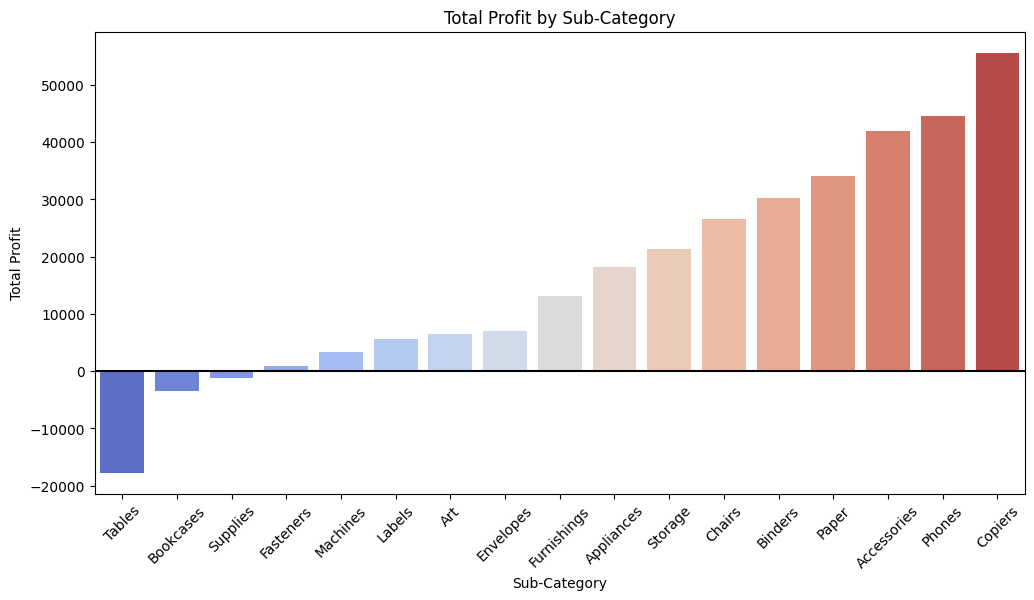

In [65]:
print("\n--- Profit by Sub-Category (Bar Chart) ---")
plt.figure(figsize=(12,6))
subcat_profit = df.groupby('Sub-Category')['Profit'].sum().sort_values()
sns.barplot(x=subcat_profit.index, y=subcat_profit.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.axhline(0, color='black')
plt.title("Total Profit by Sub-Category")
plt.ylabel("Total Profit")


Profit by Region


--- Profit by Region (Bar Chart) ---


/tmp/ipython-input-992181796.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




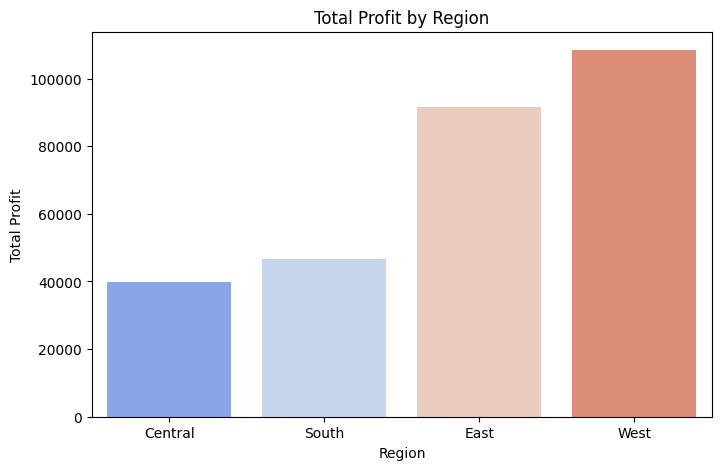

In [66]:
print("\n--- Profit by Region (Bar Chart) ---")
plt.figure(figsize=(8,5))
region_profit = df.groupby('Region')['Profit'].sum().sort_values()
sns.barplot(x=region_profit.index, y=region_profit.values, palette="coolwarm")
plt.title("Total Profit by Region")
plt.ylabel("Total Profit")
plt.show()

Sales vs Profit


--- Sales vs Profit (Scatter Plot) ---


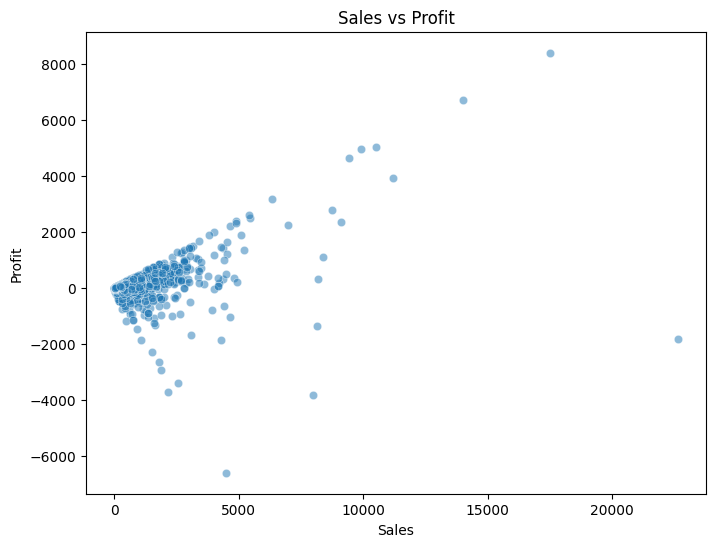

In [43]:
print("\n--- Sales vs Profit (Scatter Plot) ---")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Sales', y='Profit', alpha=0.5)
plt.title("Sales vs Profit")
plt.show()

Discount vs Profit


--- Discount vs Profit (Scatter Plot) ---


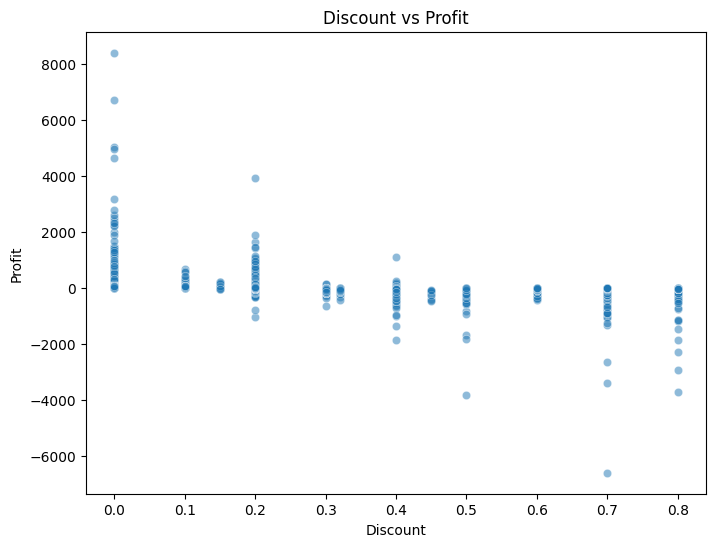

In [44]:
print("\n--- Discount vs Profit (Scatter Plot) ---")
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Discount', y='Profit', alpha=0.5)
plt.title("Discount vs Profit")
plt.show()

US Profit Map

In [45]:
print("\n--- US Profit Map (Interactive) ---")
import plotly.express as px

state_profit = df.groupby('State')['Profit'].sum().reset_index()

fig = px.choropleth(state_profit,
                    locations='State',
                    locationmode="USA-states",
                    color='Profit',
                    color_continuous_scale="RdYlGn",
                    scope="usa",
                    title='Total Profit by State')
fig.show()



--- US Profit Map (Interactive) ---


Correlation matrix

Correlation Matrix:
                   Sales  Discount    Profit  Profit Margin
Sales          1.000000 -0.028190  0.479064       0.003444
Discount      -0.028190  1.000000 -0.219487      -0.864452
Profit         0.479064 -0.219487  1.000000       0.223732
Profit Margin  0.003444 -0.864452  0.223732       1.000000


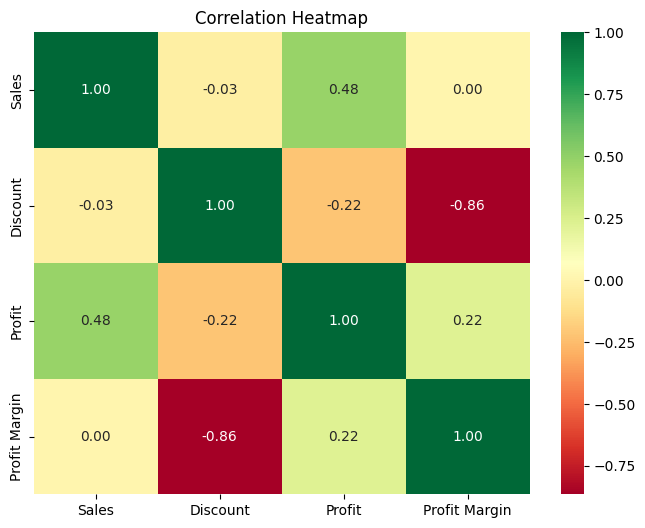

In [49]:
corr_matrix = df[['Sales', 'Discount', 'Profit', 'Profit Margin']].corr()
print("Correlation Matrix:\n", corr_matrix)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="RdYlGn", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Linear Regression

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features and target
X = df[['Sales', 'Discount']]
y = df['Profit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Results
print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score on Test Set:", model.score(X_test, y_test))


Regression Coefficients: [   0.25431358 -209.74004461]
Intercept: 6.191766761547441
R^2 Score on Test Set: -0.7036572232316536


K-Means Clustering

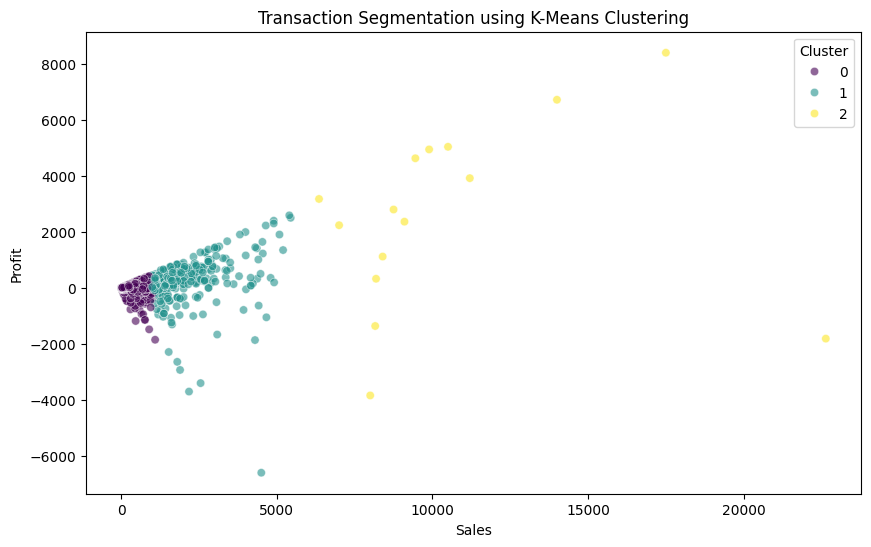

In [51]:
from sklearn.cluster import KMeans

# Use Sales and Profit for clustering
X_cluster = df[['Sales', 'Profit']]

# K-Means model
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_cluster)

# Visualize clusters
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Cluster', palette='viridis', alpha=0.6)
plt.title("Transaction Segmentation using K-Means Clustering")
plt.show()
